Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


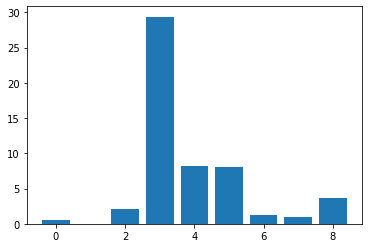

Train (191, 9) (191,)
test (95, 9) (95,)


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from matplotlib import pyplot

def load_dataset(filename):
    df = pd.read_csv(filename, header = None)
    dataset = df.values
    X = dataset[:,:-1]
    y = dataset[:,-1]
    X = X.astype(str)
    return X,y

def input_preparation(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

def target_preparation(y_train,y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc,y_test_enc

def feature_selection(X_train,y_train, X_test):
    fs = SelectKBest(score_func = chi2 , k = 'all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs,X_test_fs,fs

X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv')
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.33, random_state =1)
X_train_enc, X_test_enc = input_preparation (X_train, X_test)
y_train_enc , y_test_enc = target_preparation (y_train,y_test)
X_train_fs,X_test_fs,fs = feature_selection(X_train_enc, y_train_enc,X_test_enc)

for i in range (len(fs.scores_)):
    print('Feature %d: %f' % (i,fs.scores_[i]))

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


print('Train',X_train.shape, y_train.shape)
print('test',X_test.shape,y_test.shape)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from matplotlib import pyplot

def load_dataset(filename):
    df = pd.read_csv(filename, header = None)
    dataset = df.values
    X = dataset[:,:-1]
    y = dataset[:,-1]
    X = X.astype(str)
    return X,y

def input_preparation(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

def target_preparation(y_train,y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc,y_test_enc

def feature_selection(X_train,y_train, X_test):
    fs = SelectKBest(score_func = chi2 , k = 'all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs,X_test_fs,fs

X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv')
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.33, random_state =1)
X_train_enc, X_test_enc = input_preparation (X_train, X_test)
y_train_enc , y_test_enc = target_preparation (y_train,y_test)


model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

yhat = model.predict(X_test_enc)
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


In [90]:
# evaluation of a model fit using chi squared input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# load the dataset
def load_dataset(filename):
    df = pd.read_csv(filename, header = None)
    dataset = df.values
    X = dataset[:,:-1]
    y = dataset[:,-1]
    X = X.astype(str)
    return X,y



# prepare input data
def input_preparation(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc


# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs


# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74
